# Goal: investigate ratio of misdemeanors to felonies across boroughs

**Data loading**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('/content/drive/MyDrive/NYPD_Arrests_Data__Historic__20250415.csv')

In [42]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [43]:
df['LAW_CAT_CD'].value_counts()

,count
LAW_CAT_CD,
M,3866398
F,1767834
V,297792
I,27200
9,1801
(null),10


In [44]:
df.dtypes

,0
ARREST_KEY,int64
ARREST_DATE,object
PD_CD,float64
PD_DESC,object
KY_CD,float64
OFNS_DESC,object
LAW_CODE,object
LAW_CAT_CD,object
ARREST_BORO,object
ARREST_PRECINCT,int64


**Convert to datetime, to get year easier**

In [45]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_YEAR'] = df['ARREST_DATE'].dt.year

In [46]:
allowed_categories = ["M", "F"]
mask = df['LAW_CAT_CD'].isin(allowed_categories)

df_mf = df[mask]
df_mf

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,ARREST_YEAR
0,279197226,2023-12-19,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,18,0.0,25-44,M,WHITE,988210.0,218129.0,40.765390,-73.985702,POINT (-73.985702 40.76539),2023
1,278761840,2023-12-09,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211300,F,K,67,0.0,25-44,M,BLACK,997897.0,175676.0,40.648859,-73.950820,POINT (-73.95082 40.648859),2023
2,278506761,2023-12-05,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0.0,25-44,M,BLACK,1003509.0,185018.0,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259),2023
3,278436408,2023-12-03,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,B,46,0.0,45-64,M,BLACK,1011755.0,250279.0,40.853598,-73.900577,POINT (-73.9005768807295 40.8535983673823),2023
4,278248753,2023-11-29,660.0,(null),NaN,(null),PL 2407800,M,Q,104,0.0,<18,M,WHITE HISPANIC,1011456.0,194092.0,40.699373,-73.901881,POINT (-73.901881 40.699373),2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986020,10069459,2006-01-12,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,PL 240301A,M,M,18,0.0,<18,M,BLACK,986131.0,218090.0,40.765291,-73.993211,POINT (-73.99321106099995 40.76529111600007),2006
5986021,9961133,2006-01-05,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELONY",113.0,FORGERY,PL 1657200,F,M,13,0.0,45-64,M,BLACK,986234.0,210847.0,40.745411,-73.992841,POINT (-73.99284136899996 40.745410898000046),2006
5986022,9960626,2006-01-05,782.0,"WEAPONS, POSSESSION, ETC",236.0,DANGEROUS WEAPONS,PL 2650101,M,B,44,0.0,18-24,M,BLACK,1008562.0,242817.0,40.833127,-73.912146,POINT (-73.91214592299998 40.83312673700004),2006
5986023,10039344,2006-01-10,748.0,"CONTEMPT,CRIMINAL",359.0,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 2155002,M,B,48,0.0,25-44,M,BLACK HISPANIC,1014633.0,248756.0,40.849409,-73.890180,POINT (-73.89018045099994 40.849408751000055),2006


# Adjusting for population

Population of NYC in 2020
* 8,804,190

Share of population by Borough
* Bronx 16.8
* Brooklyn 30.97
* Manhattan 19.24
* Queens 27.3
* Staten Island 5.69

In [48]:
# Setup constants

popnyc=8804190
sharebronx=0.168
sharebrooklyn=0.3097
sharemanhattan=0.1924
sharequeens=0.273
sharestaten=0.0569

pop_bronx=popnyc*sharebronx
pop_brooklyn=popnyc*sharebrooklyn
pop_manhattan=popnyc*sharemanhattan
pop_queens=popnyc*sharequeens
pop_staten=popnyc*sharestaten

BOROUGH_POP = {'B': pop_bronx, 'K': pop_brooklyn, 'M': pop_manhattan,
               'Q': pop_queens, 'S': pop_staten}
BOROUGH_NAMES = {'B': 'Bronx', 'K': 'Brooklyn', 'M': 'Manhattan',
                'Q': 'Queens', 'S': 'Staten Island'}

In [49]:
# Filter, group, add column with counts by year and borough
arrests = df_mf[(df_mf['ARREST_YEAR'] >= 2014) & (df_mf['ARREST_YEAR'] <= 2024)].groupby(['ARREST_YEAR', 'ARREST_BORO', 'LAW_CAT_CD']).size().reset_index(name='COUNT')

# Pivot table to long to calculate metrics - Metrics better in long
pivot = arrests.pivot(index=['ARREST_YEAR', 'ARREST_BORO'], columns='LAW_CAT_CD', values='COUNT')

# Get population by boro of arrest
pivot['Population'] = pivot.index.get_level_values('ARREST_BORO').map(BOROUGH_POP)

In [50]:
# Get M/F by boro of arrest per population
pivot['M_per_100k'] = (pivot['M'] / pivot['Population']) * 100000
pivot['F_per_100k'] = (pivot['F'] / pivot['Population']) * 100000
pivot['M_F_Ratio'] = pivot['M'] / pivot['F']

**Descriptive Statistics**

In [57]:
descriptive_stats = pivot[['M_per_100k', 'F_per_100k', 'M_F_Ratio']].describe()

print(descriptive_stats)

LAW_CAT_CD   M_per_100k   F_per_100k  M_F_Ratio
count         55.000000    55.000000  55.000000
mean        1769.905980   990.494049   1.734378
std          904.322420   260.390882   0.587211
min          648.119504   573.500701   0.881089
25%         1133.297254   768.360082   1.283508
50%         1502.958078   993.077528   1.526064
75%         2081.902399  1195.152453   2.093254
max         4287.199872  1631.257931   3.431231


# Prepare for plotting

In [51]:
#Unstack by the index column 'ARREST_BORO' (rows to columns) - Plotting better as wide
m_rate = pivot['M_per_100k'].unstack('ARREST_BORO').rename(columns=BOROUGH_NAMES)
f_rate = pivot['F_per_100k'].unstack('ARREST_BORO').rename(columns=BOROUGH_NAMES)
m_f_ratio = pivot['M_F_Ratio'].unstack('ARREST_BORO').rename(columns=BOROUGH_NAMES)

# Year Bronx / Brooklyn / Manhattan / Queens / Staten Island
#2014
#2015 .....

In [52]:

# Plotting function for easier visuaizations
def create_plot(data, title, ylabel):
    fig, ax = plt.subplots(figsize=(12, 7))
    data.plot(ax=ax, marker='o', linestyle='-')
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.legend(title='Borough', title_fontsize=11, fontsize=10)
    ax.grid(True)
    ax.set_xticks(data.index)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Plots**

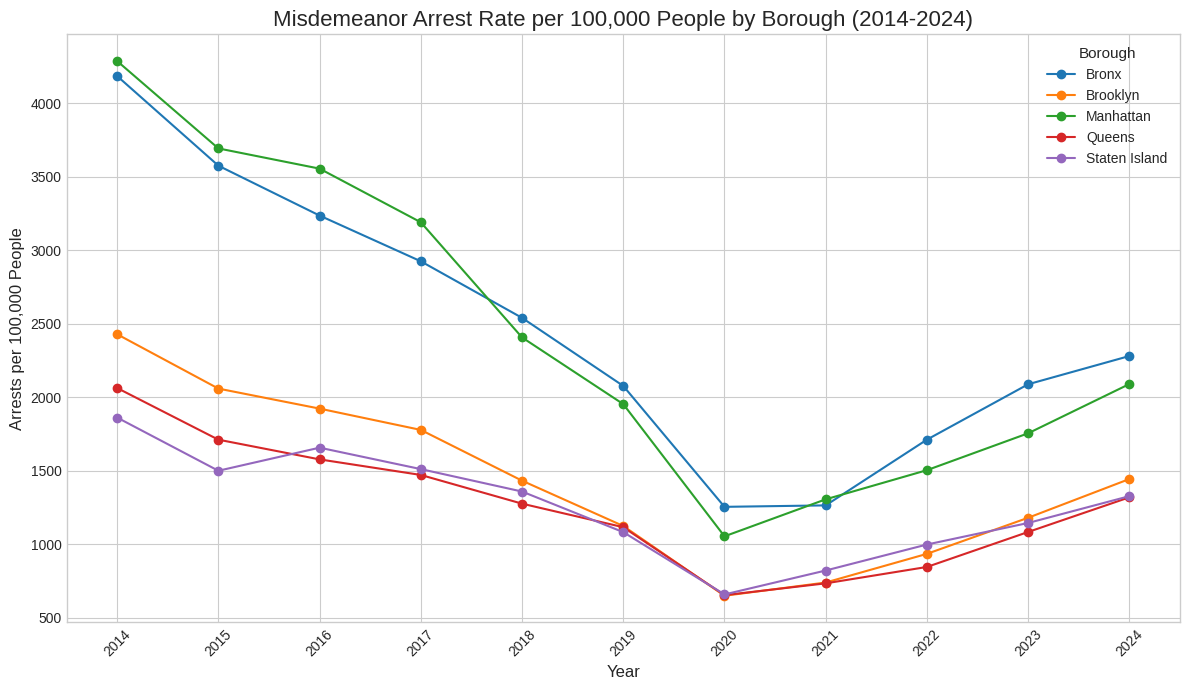

In [58]:
create_plot(m_rate, 'Misdemeanor Arrest Rate per 100,000 People by Borough (2014-2024)',
           'Arrests per 100,000 People')

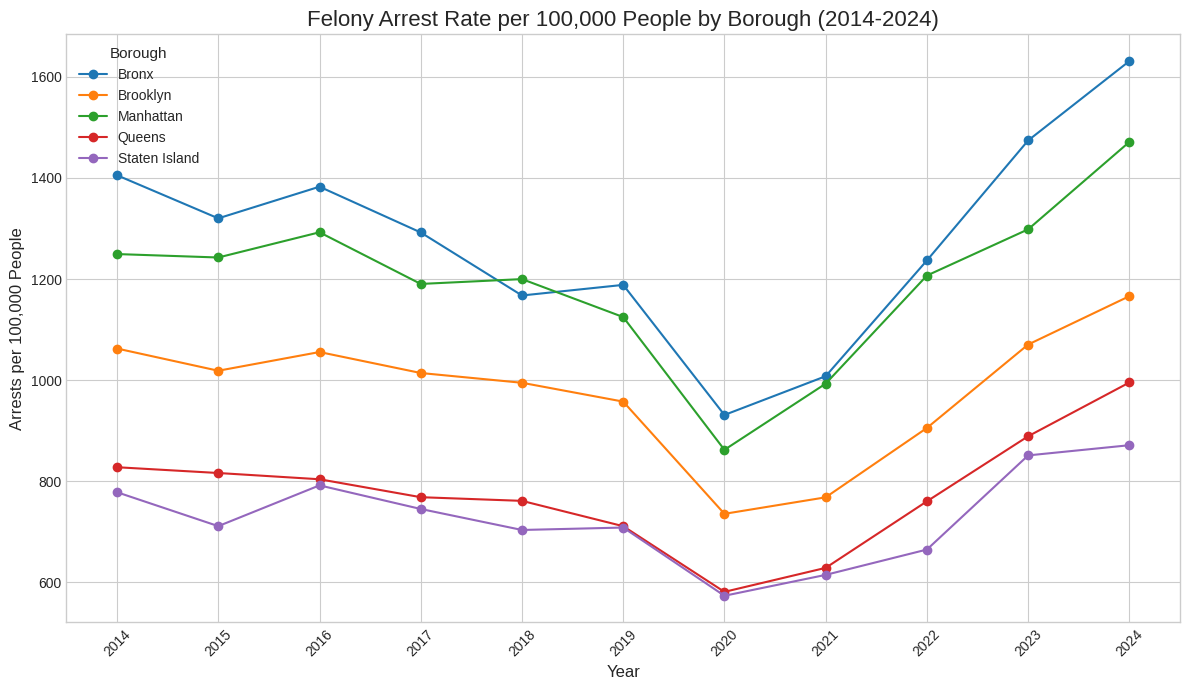

In [59]:
create_plot(f_rate, 'Felony Arrest Rate per 100,000 People by Borough (2014-2024)',
           'Arrests per 100,000 People')

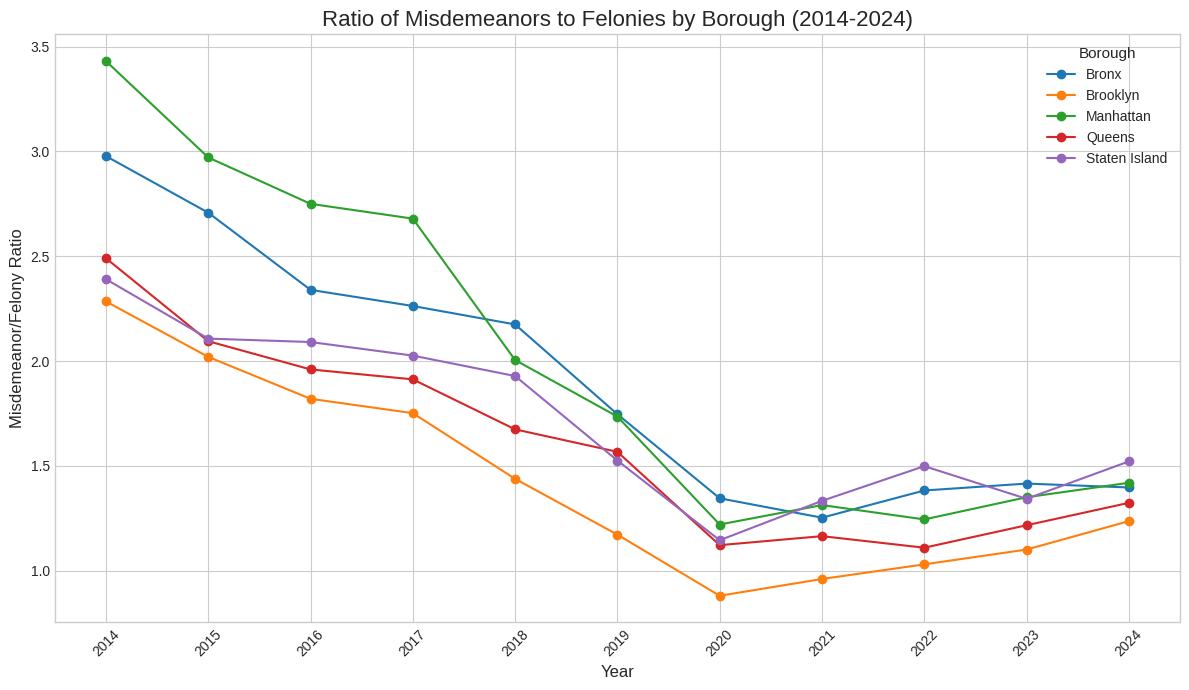

In [60]:
create_plot(m_f_ratio, 'Ratio of Misdemeanors to Felonies by Borough (2014-2024)',
           'Misdemeanor/Felony Ratio')

# Conclusions



1.   Number of misdemeanor arrests per 100,000 has fallen by a factor of two for all boroughs
2.   Number of felony arrests per 100,000 has risen slightly for all boroughs
3.   These trends cause misdemeanors/felonies to also fall by a factor of two for all boroughs
4.   It is interesting to note the bunching of values for all boroughs around 1.3-1.5, does that suggest more similar policing strategies - a reason for a more detailed study

